## Handwritings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = np.float64(np.load('MNIST.npy')) 
labels = np.float32(np.load('MNIST_labels.npy'))
data /= 255 # normalize data

In [3]:
# 70,000 images w/ shape 28x28=784 
# row = image/sample
# col = represents a variable
data.shape

(70000, 784)

In [4]:
# split data
train = data[:42000]
development = data[42000:56000]
test = data[56000:]

In [5]:
# split labels
train_labels = labels[:42000]
development_labels = labels[42000:56000]
test_labels = labels[56000:]

In [6]:
train.shape

(42000, 784)

In [7]:
test.shape

(14000, 784)

In [8]:
development.shape

(14000, 784)

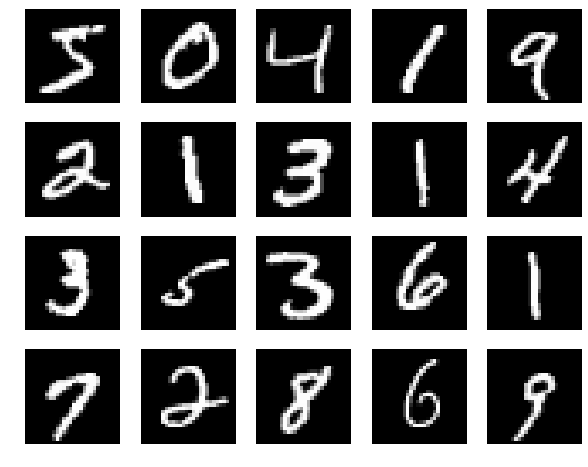

In [9]:
# display a few images
nrows = 4; ncols= 5;

plt.figure(figsize=(ncols * 2, nrows * 2))
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(data[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

plt.axis('off')
plt.show()

In [10]:
#single image display
#plt.imshow(data[1].reshape(28, 28), cmap='gray')
#plt.show()

## Part 1: PCA

### Part a)
steps:
- normalize data to zero mean
- calculate covariance matrix $\Sigma$
- find orthonormal eigenvectors of $\Sigma$

In [11]:
# function performs PCA
def pca(data, n_components):
    
    # normaliza data to zero mean
    center_data = data - data.mean(axis=0)
    
    # calculate covariance matrix of data
    cov = np.cov(center_data.T)
    
    # eigenvectors of covariance matrix
    # eigenvalues denote amount of variance
    # 1st component has largest variance, 2nd has 2nd, etc.
    evalues, evector = np.linalg.eigh(cov)
    
    order = evalues.argsort()[::-1] # proper order (max to min)
    #print(order)
    num = order[:n_components]
    components = evector[:, num].T.real  # only real values
    
    # PCs - rows of components
    return components, evalues[::-1]

In [12]:
# extract first ten principal components
components, _ = pca(train, 10)

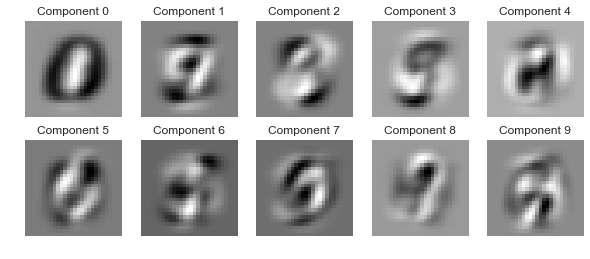

In [13]:
# display first ten principal components
nrows = 2; ncols= 5;
plt.figure(figsize=(ncols * 2, nrows * 2))
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow((components)[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

    plt.title("Component {}".format(i))
plt.axis('off')
plt.show()

### Part b)
The singular values, or eigenvalues, correspond to the variance of the principal components.

In [14]:
all_components, all_eigenvalues = pca(train, len(train))

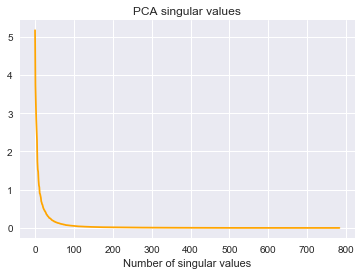

In [15]:
plt.plot(all_eigenvalues.real, c='orange')
plt.xlabel('Number of singular values')
plt.title('PCA singular values')
plt.show()

### Part c)

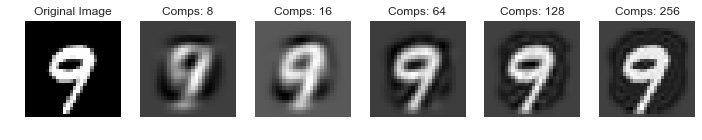

In [16]:
num = np.random.randint(len(test))
mean = test[num].mean()
test_image = test[num] - mean
projected = np.dot(test_image, all_components.T)

comps = [8, 16, 64, 128, 256]
plt.figure(figsize=((len(comps) + 1) * 2, 2))
plt.subplot(1, len(comps) + 1, 1)
plt.imshow(test[num].reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.title('Original Image') 

count = 2
for comp in comps:
    pro = np.dot(all_components.T[:, :comp], projected[:comp])
    plt.subplot(1, len(comps) + 1, count)
    plt.imshow((pro + mean).reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.title('Comps: {}'.format(comp))
    count+= 1
    
plt.show()

The components all seem to get some aspect of the digit.
<br>If the components added cumulatively, then the digit gradually
appears better. 
<br> The top components seems to capture the area were the digit
resides.

## Part 2: k-means

In [17]:
# cluster training data
num_clusters = 25
model = KMeans(n_clusters=num_clusters).fit(train)

# get centers & cluster labels
centers = model.cluster_centers_
cluster_labels = model.labels_

In [18]:
# dataframe allows to compare the digit label
# with cluster label 
train_df = pd.DataFrame(train)
train_df.index.name = 'Data Point'
train_df['Cluster Label'] = cluster_labels
train_df['Digit Label'] = train_labels

In [19]:
# sort by Cluster Label column
train_df = train_df.sort_values(['Cluster Label'])
#train_df

In [20]:
# associate centers w/ the digit label by
# the most common digit label
# for that cluster 

labeled_centers = np.zeros(num_clusters, dtype=int)
for i in range(num_clusters):
    labeled_centers[i] = train_df[train_df['Cluster Label'] == i]['Digit Label'].mode()

In [21]:
labeled_centers

array([5, 8, 1, 0, 1, 4, 6, 8, 4, 9, 2, 3, 0, 6, 3, 0, 7, 2, 7, 3, 5, 1,
       6, 4, 9])

In [22]:
#cluster centers
pd.DataFrame(centers)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.084202e-17,8.727827e-18,5.149960e-18,1.463673e-18,-7.860466e-19,-2.270048e-19,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.649399e-18,8.131516e-18,4.906015e-18,1.341700e-18,-9.351244e-19,-2.219226e-19,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.612927e-17,1.626303e-17,8.375462e-18,3.022214e-18,1.206175e-18,-2.829090e-19,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.396793e-18,1.626303e-19,1.490778e-18,-2.981556e-19,-1.382358e-18,-1.643244e-19,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.016264e-04,5.225275e-06,3.930233e-18,8.809143e-19,-1.517883e-18,-2.049820e-19,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.573772e-03,4.732091e-03,4.016210e-03,2.378179e-03,2.147641e-03,2.912056e-04,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.344411e-17,9.974660e-18,5.692061e-18,1.721171e-18,-4.472334e-19,-2.354752e-19,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.170938e-17,9.161508e-18,5.339696e-18,1.558541e-18,-6.640738e-19,-2.303930e-19,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.441989e-17,1.046255e-17,5.908902e-18,1.816039e-18,-3.252607e-19,-2.388633e-19,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.438193e-04,4.330776e-04,1.551577e-04,3.862470e-18,2.276825e-18,-3.134022e-19,0.0,0.0,0.0,0.0


In [23]:
# where we see the first center is 
# associated with digit label 5
labeled_centers = list(zip(labeled_centers, centers))

In [24]:
# infer label from test data by
# finding closest cluster center
def infer_label(data, labeled_centers):
    
    index = 0
    val = 1000  # large number to get the if-condition going
    for i in range(len(labeled_centers)):
        tmp = np.linalg.norm(data - labeled_centers[i][1])
        if val > tmp:
            val = tmp
            index = i
            
    return labeled_centers[index][0]
        

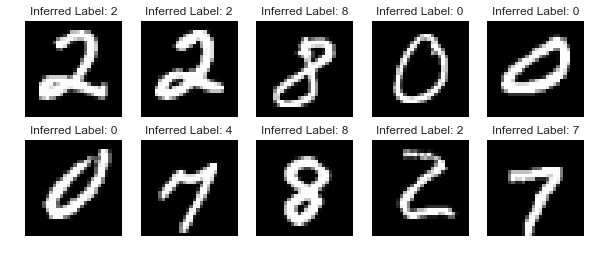

In [25]:
# display a few random images
# from the test data

random = test[np.random.randint(len(test), size=10)]  # ten random images
nrows = 2; ncols= 5;

plt.figure(figsize=(ncols * 2, nrows * 2))
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(random[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

    plt.title("Inferred Label: {}".format(infer_label(random[i], labeled_centers)))
plt.axis('off')
plt.show()

Here are ten random images where their digit label is being inferred. Although not perfect, the k-mean does represent some digits well. I noticed that it struggles comparing 4 and 9.

## Part 3: Spectral clustering

In [26]:
# training set for spectral clustering
spectural_train = train[:1000]
spectural_labels = train_labels[:1000]

#weights = sim_matrix(spectral_train, h=0.5)

rows = spectural_train.shape[0]
weights = np.zeros((rows, rows))
weights.shape

h = 25  # bandwidth parameter (scaling factor)
for row in range(rows):
    weights[row] = np.exp(-(np.linalg.norm(
        spectural_train[row] - spectural_train, axis=1) ** 2) / h)
    

In [27]:
# get sum of each row
# form diagonal matrix w/ each sum
weights_sum = weights.sum(axis=1)
diagonal = np.zeros(weights.shape)
np.fill_diagonal(diagonal, weights_sum)

# diagonal inverse
inv = np.linalg.inv(diagonal ** 0.5) 

# Laplacian
lap = np.eye(inv.shape[0]) - np.matmul(np.matmul(inv, weights), inv)

evalues, evectors = np.linalg.eig(lap)

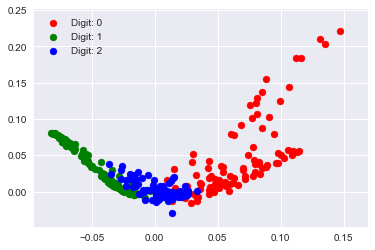

In [28]:
# Data Projection on eigvecs 1,2
d = 3 
ev = evectors[:, 0: d]

# Show first 3 classes on the projection on eigvecs 1,2 
colors=['red', 'green', 'blue']
digit = [0, 1, 2]
for i, c in enumerate(colors):
    plt.scatter(ev[spectural_labels == i, 1], ev[spectural_labels == i, 2], color=c, label='Digit: {}'.format(digit[i]))
    plt.legend()

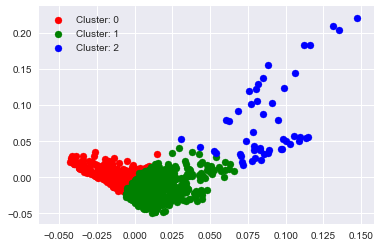

In [29]:
spectural_kmeans = KMeans(n_clusters=4).fit(ev)

# get centers & cluster labels
spectural_centers = spectural_kmeans.cluster_centers_
spectural_cluster_labels = spectural_kmeans.labels_

# Show first 3 classes on the projection on eigvecs 1,2 
colors=['red', 'green', 'blue']
digit = [0, 1, 2]
for i, c in enumerate(colors):
    plt.scatter(ev[spectural_cluster_labels == i, 1], ev[spectural_cluster_labels == i, 2],
                color=c, label='Cluster: {}'.format(digit[i]))
    plt.legend()

### Part 4: Classification (work in progress)

### Part a)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(fit_intercept=True, C=1000000, penalty='l2',
                       solver='lbfgs', multi_class='multinomial')

In [ ]:
lg.fit(train[:1000], train_labels[:1000])  #(42000,784) (42000)

In [ ]:
# returns predicted labels for development data
# using trained model
predict = lg.predict(development)  #(14000, 784)

In [ ]:
score = lg.score(development, development_labels)
err_rate = 1 - score
print('Error rate %d percent' % (err_rate *100.))

### Part b)

In [ ]:
# initiate logistc regression
# for principal components 
lg_PC = LogisticRegression(fit_intercept=True, C=1000000, penalty='l2',
                           solver='lbfgs', multi_class='multinomial')

In [ ]:
# (42000, 100)
projected_train = np.matmul(train, all_components[:100].T)

In [ ]:
#(100, 14000)
projected_development = np.matmul(all_components[:100], development.T)

In [ ]:
lg_PC.fit(projected_train, train_labels)

In [ ]:
predict_PC = lg_PC.predict(projected_development.T)


In [ ]:
def count_error(predict, label_dev):
    c = 0
    for i in range(len(label_dev)):
        if predict[i] != label_dev[i]:
            c += 1
            
    return c * 1.0 / len(label_dev)

In [ ]:
count_error(predict_PC, development_labels)

In [ ]:
score = lg_PC.score(projected_development.T, development_labels)
err_rate = 1 - score
print('Error rate {:.2f}% percent'.format(err_rate *100.))

In [ ]:
# function will be passed under a for loop
# to see what the optimal k is
# i.e. when the hits a minimum
def optimal_ksearch(k_num, training_data, development_data):
    lg_PC = LogisticRegression(fit_intercept=True, C=1000000, penalty='l2',
                           solver='lbfgs', multi_class='multinomial')
    
    projected_train = np.matmul(training_data, all_components[:k_num].T)
    projected_development = np.matmul(all_components[:k_num],
                                      development_data.T)
    
    lg_PC.fit(projected_train, train_labels)
    predict_PC = lg_PC.predict(projected_development.T)
    score = lg_PC.score(projected_development.T, development_labels)
    err_rate = 1 - score
    
    return err_rate *100
    

In [ ]:
# get error of 49 k-values
error_array = np.zeros(49)
val = 0
for i in range(3,150, 3):
    error_array[val] = optimal_ksearch(i, train, development)
    val+=1

In [ ]:
# plot error as a function of k
x = np.linspace(3,150, 49)
plt.plot(x, (error_array * 100), c='orange')
plt.ylabel('Error in Percentage')
plt.xlabel('Number k-components used')
plt.title('Error in Logistic Regression with PCA')
plt.show()

In [ ]:
%who

In [ ]:
error_array

### Part c)

In [ ]:
error_array.argmin()

In [ ]:
optimal_k = int(x[42].round())
optimal_k

In [ ]:
data = np.concatenate((train, development))
projected_data = np.matmul(data, all_components[:optimal_k].T)

In [ ]:
lg_optimal = LogisticRegression(fit_intercept=True, C=1000000, penalty='l2',
                           solver='lbfgs', multi_class='multinomial')

In [ ]:
data_labels = np.concatenate((train_labels, development_labels))
lg_optimal.fit(projected_data, data_labels)

In [ ]:
projected_test = np.matmul(all_components[:optimal_k], test.T)
predict_optimal = lg_optimal.predict(projected_test.T)

In [ ]:
score_optimal = lg_optimal.score(projected_test.T, test_labels)

In [ ]:
err_rate_optimal = 1 - score_optimal
err_rate_optimal * 100

The error is small with the optimal k-components. It is approximately 2% smaller.

In [ ]:
raw_data = np.concatenate((train, development))
lg_optimal = LogisticRegression(fit_intercept=True, C=1000000, penalty='l2',
                           solver='lbfgs', multi_class='multinomial')

data_labels = np.concatenate((train_labels, development_labels))
lg_optimal.fit(raw_data, data_labels)

raw_test = test
raw_predict = lg_optimal.predict(raw_test)
raw_score = lg_optimal.score(raw_test, test_labels)

In [ ]:
err_rate_optimal = 1 - raw_score
err_rate_optimal * 100

The raw results give a comparable measure than those with the optimal k-components.

In [ ]:
arr = np.array([[1, 2], [3, 4]])
arr

In [ ]:
arr.T

In [ ]:
np.dot(arr, arr.T)